<a href="https://colab.research.google.com/github/EdwynZN/TLGColab/blob/main/SC66_Reto_ZAMBRANO_NEMEGYEI_EDWIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import networkx as nx
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('empleados.mtx', header=None, sep=' ', names=[0, 1])
G = nx.Graph()
G.add_edges_from(list(df.itertuples(index=False, name=None)))

In [20]:
### Tupla con lista de nodos que tienen el mismo n° de grados
def grades(sequence: list[tuple], max=True):
  next = 1 if max else -1
  i = 0 if max else -1
  grade = sequence[i][1]
  nodes = []
  while True:
    if (len(nodes) > 0 and sequence[i][1] != grade):
      break
    nodes.append(sequence[i][0])
    i += next
  return (nodes, grade)

degree_sequence = sorted(((n, d) for n, d in G.degree()), key=lambda x: x[1], reverse=True)
#dmax = degree_sequence[0]
#dmin = degree_sequence[-1]
max_nodes, max_degree = grades(degree_sequence)
min_nodes, min_degree = grades(degree_sequence, max=False)
shortest_mean = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)
f"""\
distancia promedio mas corta: {shortest_mean}, diametro: {diameter}, \
grado máximo: Empleado{"s" if len(max_nodes) > 1 else ""} {", ".join(str(word) for word in max_nodes)} con {max_degree} conexiones, \
grado mínimo: Empleado{"s" if len(min_nodes) > 1 else ""} {", ".join(str(word) for word in min_nodes)} con {min_degree} conexion"""

'distancia promedio mas corta: 2.967004826159756, diametro: 8, grado máximo: Empleado 105 con 42 conexiones, grado mínimo: Empleados 98, 92, 80, 63, 42, 15 con 1 conexion'

In [109]:
degrees_df = pd.DataFrame(degree_sequence, columns=['nodo', 'grado']).set_index('nodo')

In [111]:
f'Total de empleados: {G.number_of_nodes()}, Total de interacciones: {G.number_of_edges()}'

'Total de empleados: 143, Total de interacciones: 623'

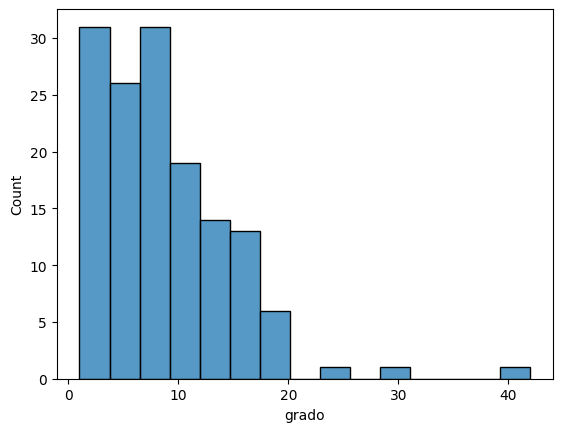

In [117]:
sns.histplot(data=degrees_df, x='grado');

## Grafo

#### Resilencia

In [37]:
import networkx.algorithms.connectivity as nxcon

nodes_removed = nxcon.minimum_node_cut(G)
edges_removed = nxcon.minimum_edge_cut(G)

f'{nodes_removed} {edges_removed}'

'{85} {(130, 98)}'

#### Centralidades

In [61]:
# grados
degrees = dict(G.degree())
sorted_degrees = pd.DataFrame.from_dict(degrees, orient='index', columns=['grados']).sort_values(by=['grados'], ascending=False)

# intermediacion
betweenness = nx.betweenness_centrality(G)
sorted_betweenness = pd.DataFrame.from_dict(betweenness, orient='index', columns=['intermediacion']).sort_values(by=['intermediacion'], ascending=False)

# cercania
closeness = nx.closeness_centrality(G)
sorted_closeness = pd.DataFrame.from_dict(closeness, orient='index', columns=['cercania']).sort_values(by=['cercania'], ascending=False)

# harmonica
harmonic = nx.harmonic_centrality(G)
sorted_harmonic = pd.DataFrame.from_dict(harmonic, orient='index', columns=['harmonica']).sort_values(by=['harmonica'], ascending=False)

#### Imagen

In [24]:
pos = nx.kamada_kawai_layout(G)

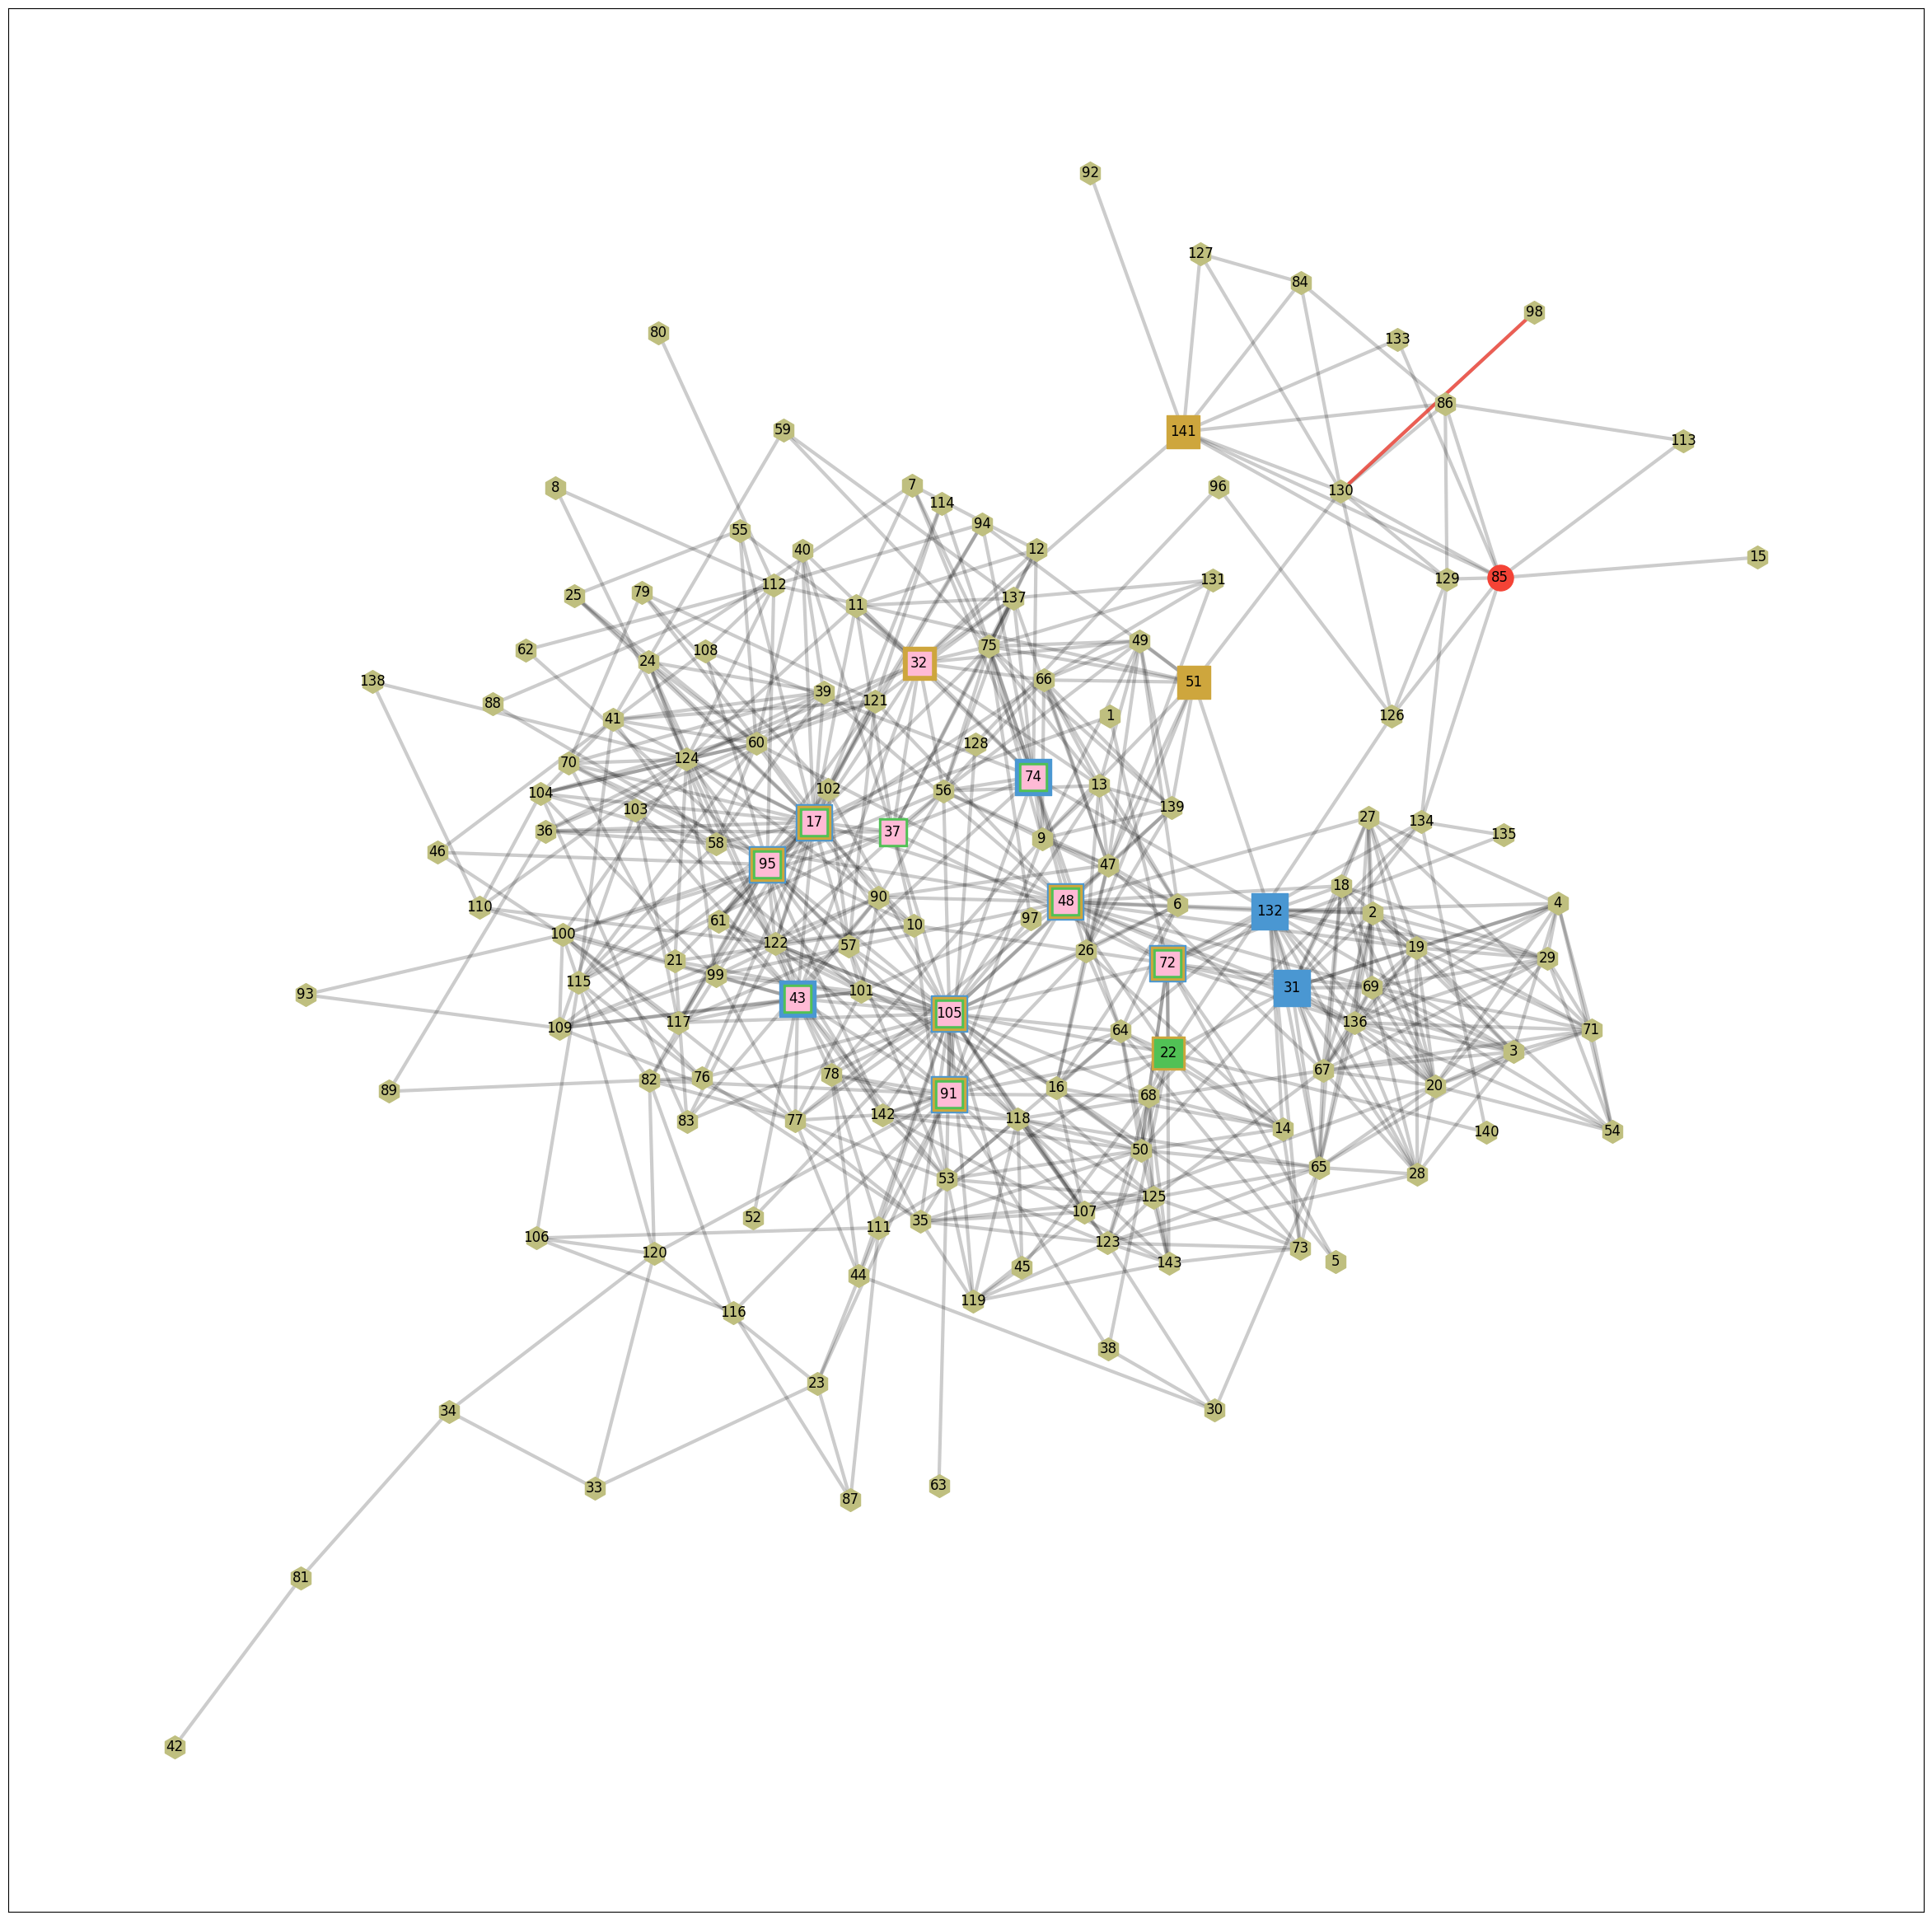

In [69]:
fig = plt.figure(figsize=(30, 30))

nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, nodelist=set(df[0].unique().tolist() + df[1].unique().tolist()), node_color="#bfbf7f",
node_shape="h", node_size=400)

## Nodos con alto grado (Azul)
nx.draw_networkx_nodes(G, pos, nodelist=sorted_degrees.iloc[0:10].index.to_list(), node_color="#4A97D2", node_shape="s", node_size=1000)

## Nodos con alta intermediacion (Naranja)
nx.draw_networkx_nodes(G, pos, nodelist=sorted_betweenness.iloc[0:10].index.to_list(), node_color="#CEA63D", node_shape="s", node_size=800)

## Nodos con alta cercania (Verde)
nx.draw_networkx_nodes(G, pos, nodelist=sorted_closeness.iloc[0:10].index.to_list(), node_color="#51C155", node_shape="s", node_size=600)

## Nodos con alta media harmonica (Rosa)
nx.draw_networkx_nodes(G, pos, nodelist=sorted_harmonic.iloc[0:10].index.to_list(), node_color="#FFBAD5", node_shape="s", node_size=400)

## Arcos y nodos con poca resilencia (Rojos)
nx.draw_networkx_edges(G, pos, width=3, alpha=0.8, edgelist=edges_removed, edge_color="#f44336")
nx.draw_networkx_nodes(G, pos, nodelist=nodes_removed, node_color="#f44336", node_shape="o", node_size=500)
nx.draw_networkx_labels(G, pos);

Los nodos 95, 17, 105, 91, 48 y 72 presentan la mayor centralidad al ser el top 10 de todos los tipos de centralidades calculadas: grado, intermediación, harmonica y cercania.

El 43 presenta 3 centralidades:
 - grado, harmonica y cercania

El 22 con 2:
 - cercania e intermediación

El 32 con 2:
 - harmonica e intermediación
#
Y finalmente el 31 y 132 solo grado y 51 y 141 solo intermediación

de 4 tipos de centralidades (y cada una con sus 10 nodos importantes) solo hay 13 nodos diferentes, lo cual significa que comparten muchas caracteristicas de centralidad en pocos nodos

## Grafo dirigido

In [70]:
DG = nx.DiGraph()
DG.add_edges_from(list(df.itertuples(index=False, name=None)))

In [76]:
pagerank = nx.pagerank(DG)
sorted_pagerank = pd.DataFrame.from_dict(pagerank, orient='index', columns=['pagerank']).sort_values(by=['pagerank'], ascending=False)

In [114]:
sorted_pagerank.head(10)

,pagerank
17,0.048680
6,0.033313
7,0.032568
2,0.028038
10,0.025728
11,0.025187
3,0.019377
14,0.019069
9,0.017630
43,0.017307


In [71]:
pos = nx.kamada_kawai_layout(DG)

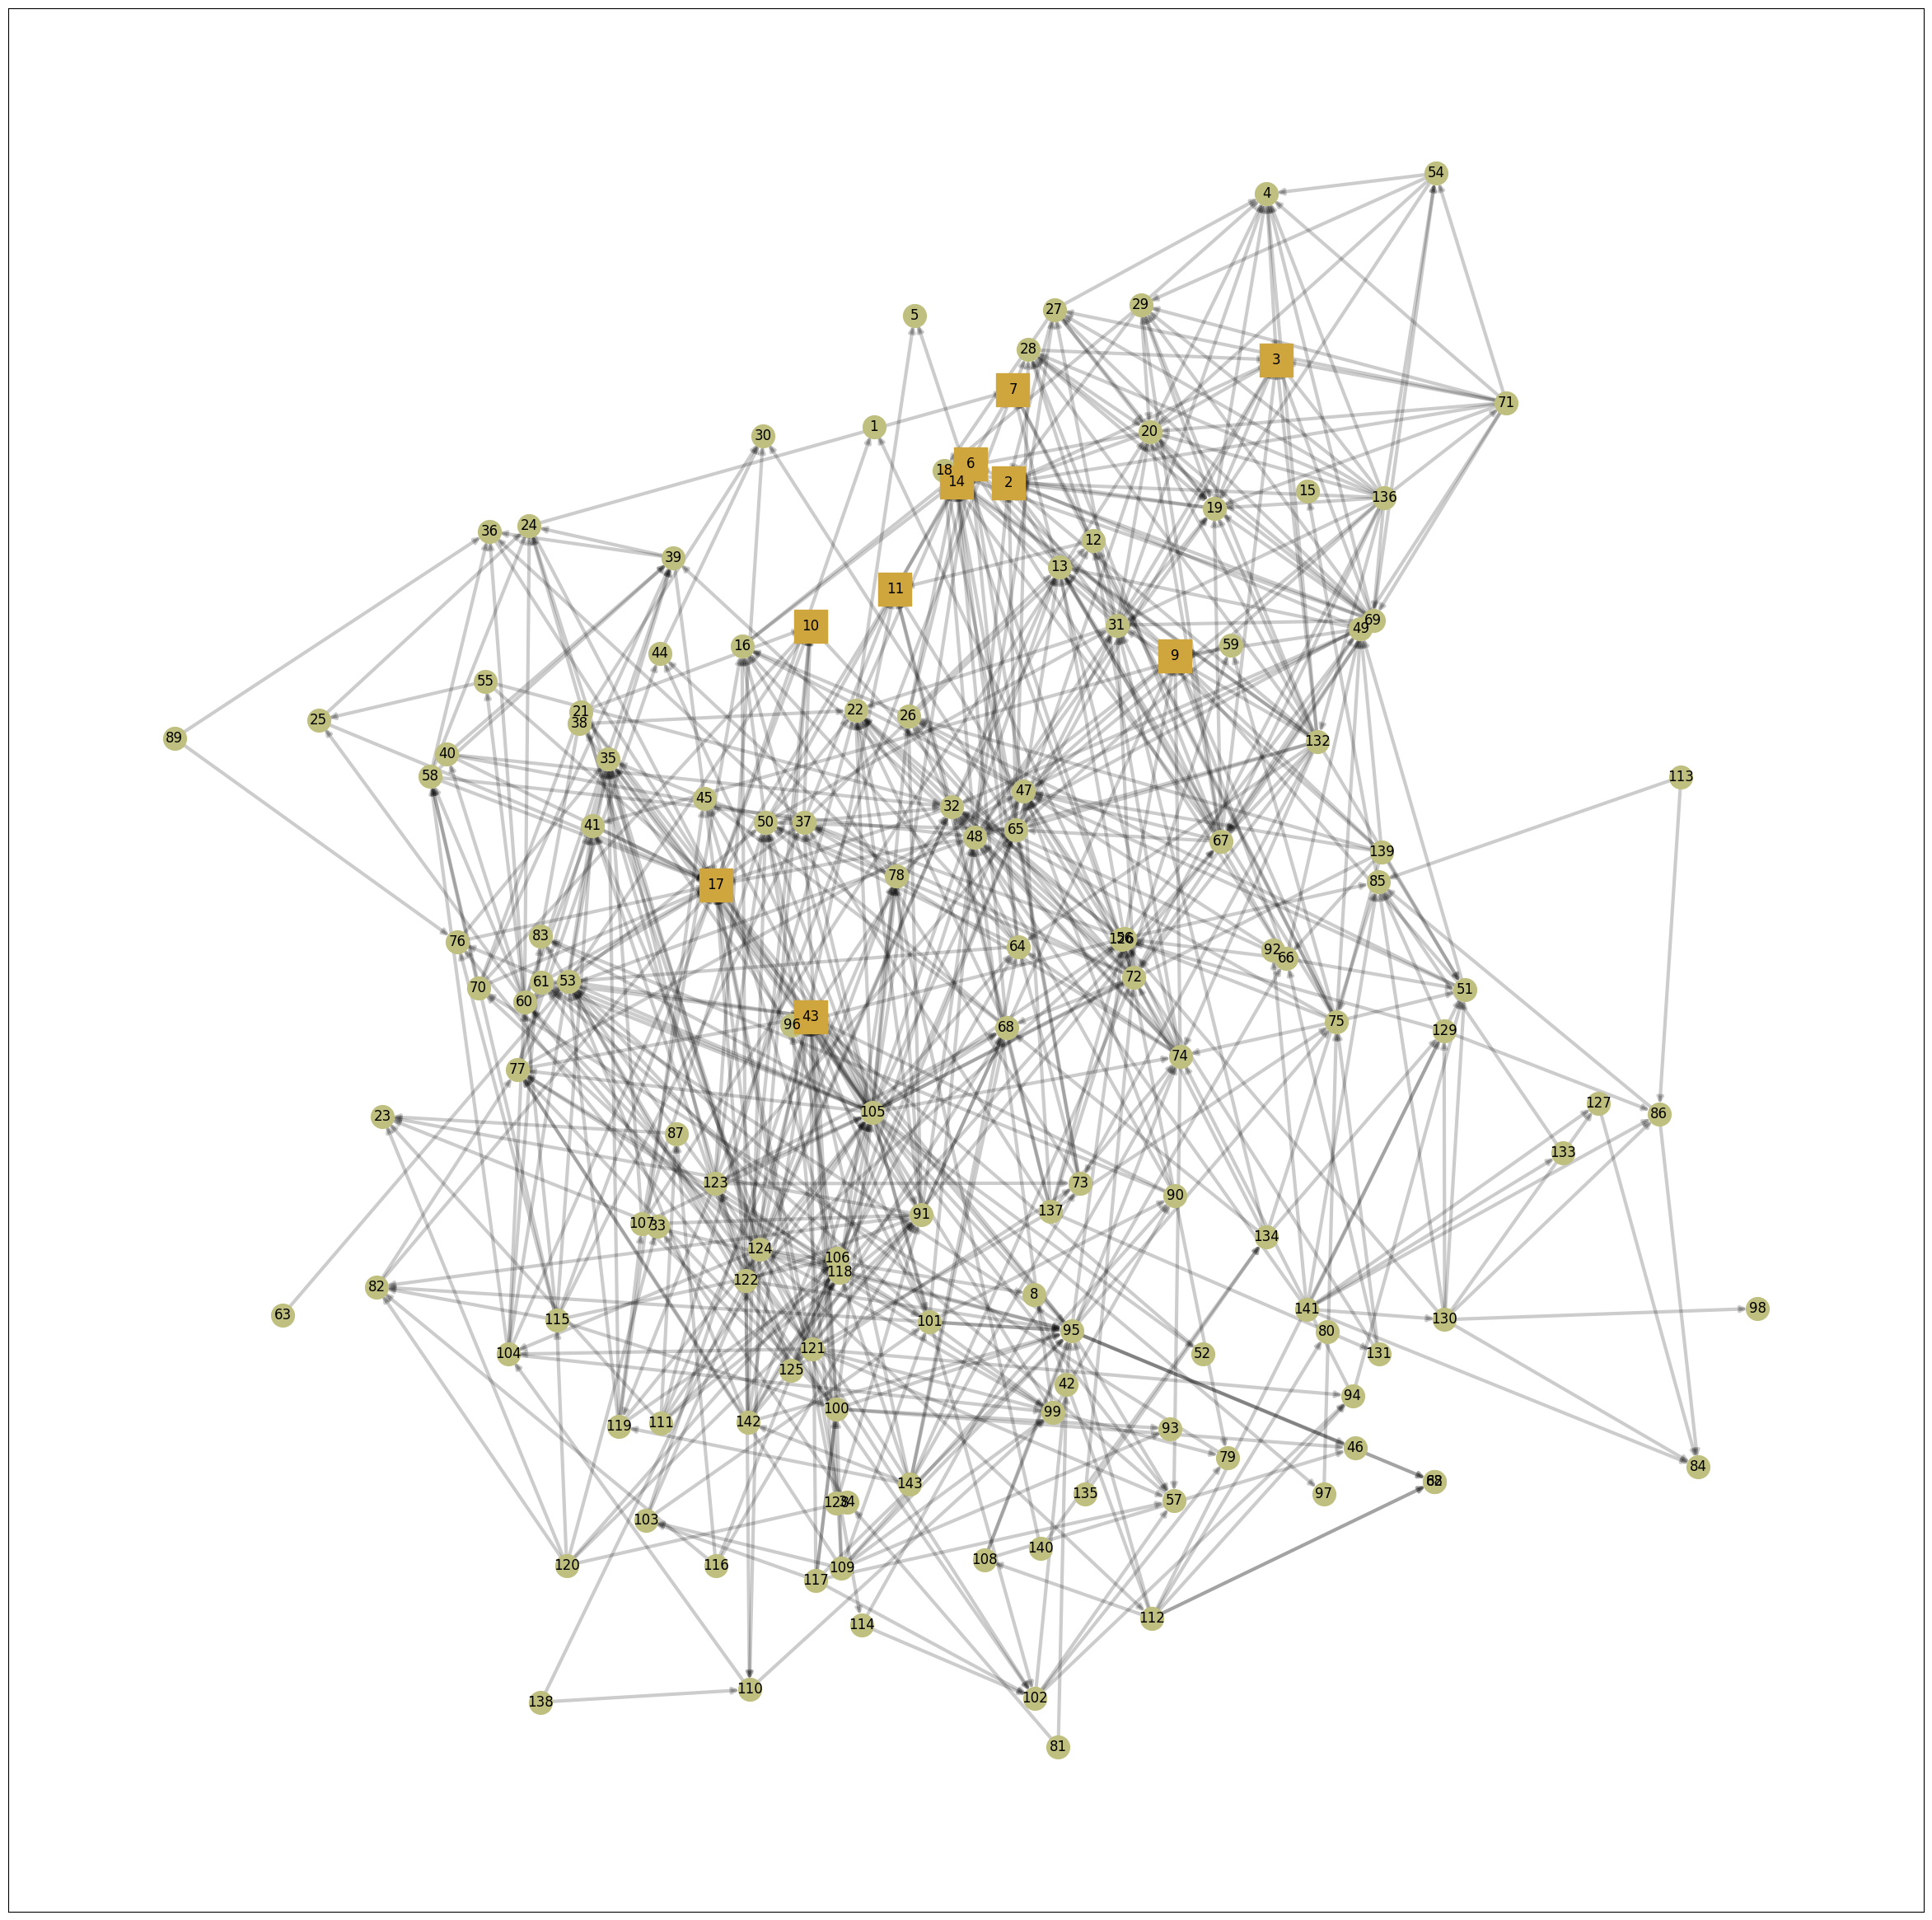

In [77]:
fig = plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(DG, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(DG, pos, node_color="#bfbf7f", node_shape="o", node_size=400)

## Nodos con alta centralidad de PageRank (Naranja)
nx.draw_networkx_nodes(DG, pos, nodelist=sorted_pagerank.iloc[0:10].index.to_list(), node_color="#CEA63D", node_shape="s", node_size=800)

nx.draw_networkx_labels(DG, pos);